# Algorithms in Bioinformatics / Homework 1

## Task 1


Bernoulli trials are one of the simplest experimential setups: there are a number of iterations of some activity, where each iteration (or trial) may turn out to be a “success” or a “failure”. 

In [1]:
import numpy as np
import scipy
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
# data
data = [0,1,0,0,0,0,0,1,0,0] # 0 - failure 1 - success
N = 10
k = 2
a = 4 # alpha
b = 4 # beta

In [3]:
# theta
theta = np.linspace(0,1,10)
theta # returns evenly spaced numbers over a specified interval

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

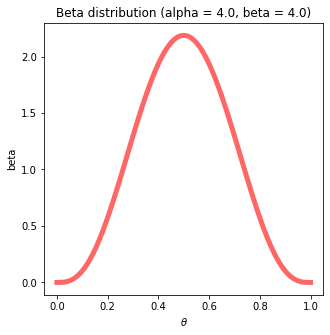

In [4]:
# beta distribution - it is used to model things that have a limited range, like 0 to 1

plt.figure(figsize=(5,5))
plt.title("Beta distribution (alpha = %0.1f, beta = %0.1f)"%(a,b))
r = np.arange(0.,1.01,.01)
plt.xlabel("$\\theta$")
plt.ylabel("beta")
plt.plot(r, scipy.stats.beta.pdf(r, a, b), 'r-', lw=5, alpha=0.6, label='beta pdf')
plt.show()

In [5]:
def plot_prior_posterior_beta(a,b,k,n):
    r=np.arange(0.,1.01,.01)
    plt.figure(figsize=(10,5))
    ax = plt.subplot(121)
    plt.title("Prior distribution")
    ax.plot(r, scipy.stats.beta.pdf(r,a, b), 'r-', lw=2, alpha=0.6, label='beta pdf')
    ax.set_xlabel("$\\theta$")
    ax.set_ylabel("prior probability density")
    ax=plt.subplot(122)
    aa=a+k; bb=b+n-k
    plt.title("Posterior distribution")
    ax.plot(r, scipy.stats.beta.pdf(r,aa,bb), 'b-', lw=2, alpha=0.6, label='beta pdf')
    ax.set_xlabel("$\\theta$")
    ax.set_ylabel("posterior probability density")
    plt.show()

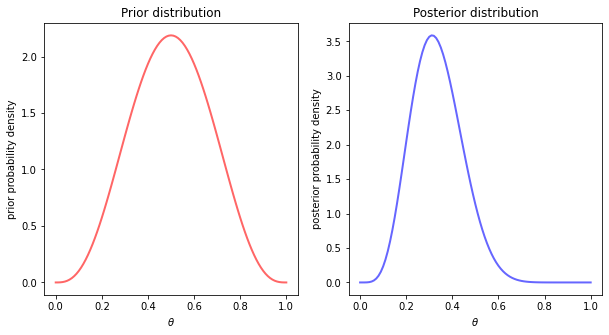

In [6]:
plot_prior_posterior_beta(a=a,b=b,k=k,n=N)

In [7]:
# MAP score
map_score = (k+a-1)/(k+N-k+a+b-2)
map_score # 0.3125

0.3125

In [8]:
# E score
E_score = (k+a)/(k+N-k+a+b)
E_score # 0.333

0.3333333333333333

## Task 2

In statistics, a Poisson distribution is a probability distribution that is used to show how many times an event is likely to occur over a specified period. In other words, it is a count distribution. Poisson distributions are often used to understand independent events that occur at a constant rate within a given interval of time. It was named after French mathematician Siméon Denis Poisson.

In [9]:
# data
k = 5 # alpha
theta = 6
reads = [8,6,7,12]
M = len(reads) # 4
N = sum(reads) # 33
beta = 1/theta # 0.167

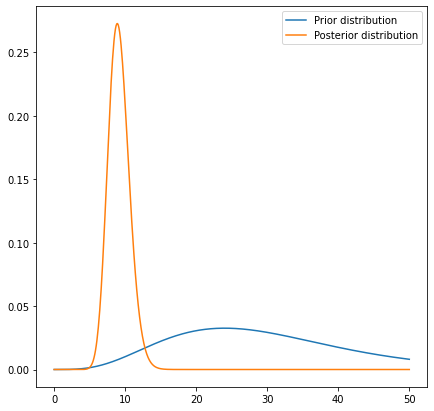

In [10]:
plt.figure(figsize=(7,7))
x = np.linspace(0,50,500)
y_prior = stats.gamma.pdf(x,a=k,scale=theta)
plt.plot(x,y_prior,label="Prior distribution")

k_poster = k + N
beta_poster = beta + M
theta_poster = 1/beta_poster
y_poster = stats.gamma.pdf(x,a=k_poster,scale=theta_poster)
plt.plot(x,y_poster,label="Posterior distribution")
plt.plot()
plt.legend()
plt.show()

## Task 3

In [11]:
from scipy import integrate

In [37]:
def integral_f(a, m, l): # where l = k + beta - 1
  return ((a + 1) ** m) * ((1 - a) ** l)
# to compute definite integral - integrate.quad()
denom, _ = integrate.quad(integral_f, 0, 1, args=(80,29)) # a from 0 to 1 # _ an empty space for unneces. paramet.

def posterior(a):
  return ((a + 1) ** 80) * ((1 - a) ** 29) / denom

a = np.linspace(0,1,100) # number of samples to generate = 100 (num)

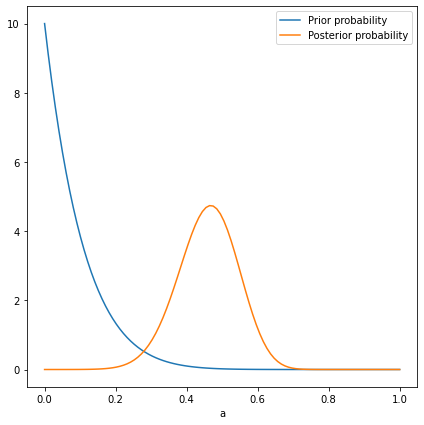

In [59]:
from scipy.stats import beta

plt.plot(a, beta.pdf(a, 1, 10), label = "Prior probability") 
plt.plot(a, posterior(a), label = "Posterior probability") 
plt.legend()
plt.xlabel("a")
plt.rcParams["figure.figsize"] = (7,7)
plt.show()